Initializing dataset...
Loading dataset...
Preparing datasets...
Train set size: 400, Test set size: 100
Balancing dataset...
Final Balanced Dataset - Positive: 240, Negative: 160
Final Train set size: 400, Test set size: 100
Initializing QSVM...
Applying PCA...
PCA Variance Ratio: 1.0000
Initializing quantum kernel...
Training QSVM...
QSVM training complete. Time taken: 3.84 minutes.
Evaluating QSVM...
QSVM evaluation complete. Time taken: 1.91 minutes.
QSVM Accuracy: 0.6000
Precision: 0.5625
Recall: 0.6000
F1 Score: 0.4825
Confusion Matrix:
 [[ 2 38]
 [ 2 58]]


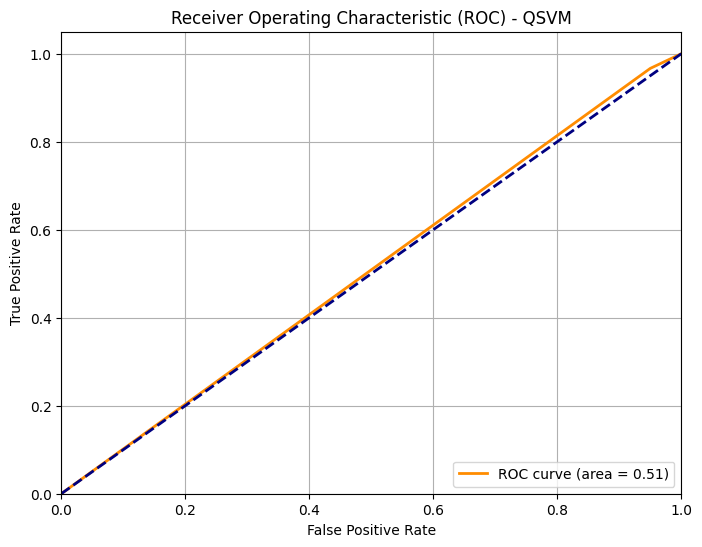

Saving QSVM model...
QSVM model saved to Saved_Models/qsvm_smallmodel.pkl
Displaying ZZFeatureMap quantum circuit...


MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

In [ ]:
import numpy as np
import pandas as pd
import joblib  # For model saving/loading
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import time
import os

# Limit dataset size to prevent memory issues
# MAX_SAMPLES = 2500   

class QSVM:
    def __init_
    
    _(self, data, pca_components, reps=1):
        print("Initializing QSVM...")
        self.data = data
        self.pca_components = pca_components
        self.reps = reps
        self.apply_pca()
        self.initialize_quantum_kernel()

    def apply_pca(self):
        """Reduce feature dimensions using PCA"""
        print("Applying PCA...")
        pca = PCA(n_components=self.pca_components)
        self.data.train_features = pca.fit_transform(self.data.train_features)
        self.data.test_features = pca.transform(self.data.test_features)
        print(f"PCA Variance Ratio: {sum(pca.explained_variance_ratio_):.4f}")

    def initialize_quantum_kernel(self):
        """Set up the quantum feature map and fidelity kernel"""
        print("Initializing quantum kernel...")
        self.feature_map = ZZFeatureMap(
            feature_dimension=self.pca_components,
            reps=self.reps,
            entanglement="linear"
        )
        self.quantum_kernel = FidelityQuantumKernel(feature_map=self.feature_map)

    def fit(self):
        """Train QSVM on quantum kernel"""
        print("Training QSVM...")
        start_time = time.time()
        self.qsvc = QSVC(quantum_kernel=self.quantum_kernel, C=0.7)
        self.qsvc.fit(self.data.train_features, self.data.train_labels)
        end_time = time.time()
        print(f"QSVM training complete. Time taken: {(end_time - start_time) / 60:.2f} minutes.")

    def evaluate(self):
        """Evaluate QSVM using accuracy metrics"""
        print("Evaluating QSVM...")
        start_time = time.time()
        predictions = self.qsvc.predict(self.data.test_features)
        end_time = time.time()
        print(f"QSVM evaluation complete. Time taken: {(end_time - start_time) / 60:.2f} minutes.")
        acc = accuracy_score(self.data.test_labels, predictions)
        prec = precision_score(self.data.test_labels, predictions, average="weighted")
        rec = recall_score(self.data.test_labels, predictions, average="weighted")
        f1 = f1_score(self.data.test_labels, predictions, average="weighted")
        conf_matrix = confusion_matrix(self.data.test_labels, predictions)

        print(f"QSVM Accuracy: {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall: {rec:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print("Confusion Matrix:\n", conf_matrix)

        # ROC Curve
        fpr, tpr, _ = roc_curve(self.data.test_labels, predictions)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) - QSVM')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

        return {
            "accuracy": acc,
            "precision": prec,
            "recall": rec,
            "f1_score": f1,
            "confusion_matrix": conf_matrix,
            "roc_auc": roc_auc
        }

    def save_model(self, filename="Saved_Models/qsvm_smallmodel.pkl"):
        """Save the trained QSVM model"""
        if not hasattr(self, "qsvc") or self.qsvc is None:
            print("Error: No trained model found. Train the QSVM first.")
            return
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        print("Saving QSVM model...")
        joblib.dump(self.qsvc, filename)
        print(f"QSVM model saved to {filename}")

    def load_model(self, filename="Saved_Models/qsvm_smallmodel.pkl"):
        """Load a previously saved QSVM model"""
        if not os.path.exists(filename):
            print(f"Error: Model file {filename} not found.")
            return
        print("Loading QSVM model...")
        self.qsvc = joblib.load(filename)
        print(f"QSVM model loaded from {filename}")

    def show_feature_map(self):
        """Display the ZZFeatureMap circuit"""
        print("Displaying ZZFeatureMap quantum circuit...")
        self.feature_map.decompose().draw('mpl')
        plt.show()


class Data:
    def __init__(self, filename):
        print("Initializing dataset...")
        self.filename = filename
        self.load_data()
        self.prepare_datasets()

    def load_data(self):
        """Load dataset and apply necessary preprocessing"""
        print("Loading dataset...")
        self.df = pd.read_csv(self.filename)

    def prepare_datasets(self):
        """Split dataset into train/test, scale features, and balance data"""
        print("Preparing datasets...")
        features = self.df.drop(columns=["HeartDisease"]).to_numpy()
        labels = self.df["HeartDisease"].to_numpy()

        scaler = MinMaxScaler(feature_range=(0, 2 * np.pi))
        features = scaler.fit_transform(features)

        train_features, test_features, train_labels, test_labels = train_test_split(
            features, labels, test_size=0.2, stratify=labels, random_state=42
        )

        print(f"Train set size: {len(train_features)}, Test set size: {len(test_features)}")
        train_features, train_labels = self.balance_data(train_features, train_labels)
        self.train_features, self.train_labels = train_features, train_labels
        self.test_features, self.test_labels = test_features, test_labels
        print(f"Final Train set size: {len(self.train_features)}, Test set size: {len(self.test_features)}")

    def balance_data(self, features, labels, target_ratio=0.01):
        """Balance dataset by undersampling majority class"""
        print("Balancing dataset...")
        df_balanced = pd.DataFrame(features)
        df_balanced["HeartDisease"] = labels
        df_positive = df_balanced[df_balanced["HeartDisease"] == 1]
        df_negative = df_balanced[df_balanced["HeartDisease"] == 0]

        sample_size = min(len(df_positive), int(len(df_negative) / target_ratio))

        if sample_size < len(df_positive):
            df_positive_sampled = df_positive.sample(n=sample_size, random_state=42)
        else:
            df_positive_sampled = df_positive

        balanced_df = pd.concat([df_positive_sampled, df_negative]).sample(frac=1, random_state=42)

        print(f"Final Balanced Dataset - Positive: {len(df_positive_sampled)}, Negative: {len(df_negative)}")
        return balanced_df.drop(columns=["HeartDisease"]).to_numpy(), balanced_df["HeartDisease"].to_numpy()


# Running the entire flow
dataset = Data('Heart Prediction Quantum Dataset.csv')
qsvm = QSVM(dataset, pca_components=6, reps=2)
qsvm.fit()
metrics = qsvm.evaluate()
qsvm.save_model()

# Plot the Quantum Feature Map Circuit
qsvm.show_feature_map()